In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
train = pd.read_csv('0513final_train_lite.csv')

In [4]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
train = shuffle(train)

In [5]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [6]:
new_all_feature = preprocessing.scale(train_feature)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add( tf.keras.layers.Dense(units=128, input_shape=[40],            #52,47
           kernel_initializer='he_normal',
           kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
           activation='relu') )

In [10]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 300

In [11]:
model.add(tf.keras.layers.Dense(units=64,
               kernel_initializer='he_normal',  #he_normal
               kernel_regularizer= regularizers.l2(0.1),   #0.06
#               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
               activation='relu'))   #relu

In [12]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 100    #0.5  #0.3

In [13]:
model.add(tf.keras.layers.Dense(units=4, 
#                                kernel_initializer='normal',
                                activation='softmax'))    # kernel_initializer='normal',

In [14]:
adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )

In [15]:
model.compile( optimizer = adam , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
train_history = model.fit(new_all_feature , train_y, validation_split = 0.1,
                          epochs = 500, batch_size = 15, verbose=1)   #一層500  三層1500   #500比50好

Train on 171 samples, validate on 20 samples
Epoch 1/500
171/171 [==============================]171/171 [==============================] - 0s 1ms/step - loss: 30.0660 - acc: 0.3041 - val_loss: 28.0283 - val_acc: 0.5500

Epoch 2/500
171/171 [==============================]171/171 [==============================] - 0s 111us/step - loss: 27.3603 - acc: 0.3860 - val_loss: 25.5892 - val_acc: 0.5500

Epoch 3/500
171/171 [==============================]171/171 [==============================] - 0s 134us/step - loss: 24.9110 - acc: 0.4094 - val_loss: 23.3621 - val_acc: 0.5500

Epoch 4/500
171/171 [==============================]171/171 [==============================] - 0s 122us/step - loss: 22.6715 - acc: 0.4854 - val_loss: 21.2916 - val_acc: 0.5500

Epoch 5/500
171/171 [==============================]171/171 [==============================] - 0s 117us/step - loss: 20.5670 - acc: 0.4912 - val_loss: 19.3818 - val_acc: 0.6000

Epoch 6/500
171/171 [==============================]171/171 [======


Epoch 47/500
171/171 [==============================]171/171 [==============================] - 0s 102us/step - loss: 1.2438 - acc: 0.6667 - val_loss: 1.3952 - val_acc: 0.5500

Epoch 48/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 1.2323 - acc: 0.6491 - val_loss: 1.3893 - val_acc: 0.5500

Epoch 49/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 1.2232 - acc: 0.6433 - val_loss: 1.3690 - val_acc: 0.5500

Epoch 50/500
171/171 [==============================]171/171 [==============================] - 0s 111us/step - loss: 1.2002 - acc: 0.6374 - val_loss: 1.3569 - val_acc: 0.6000

Epoch 51/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 1.1876 - acc: 0.6433 - val_loss: 1.3469 - val_acc: 0.5500

Epoch 52/500
171/171 [==============================]171/171 [==============================] - 0s 111us/step - los

171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 1.0408 - acc: 0.6433 - val_loss: 1.3200 - val_acc: 0.6500

Epoch 94/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 1.0442 - acc: 0.6491 - val_loss: 1.3054 - val_acc: 0.6500

Epoch 95/500
171/171 [==============================]171/171 [==============================] - 0s 117us/step - loss: 1.0284 - acc: 0.6608 - val_loss: 1.3240 - val_acc: 0.6500

Epoch 96/500
171/171 [==============================]171/171 [==============================] - 0s 111us/step - loss: 1.0551 - acc: 0.6433 - val_loss: 1.3112 - val_acc: 0.6500

Epoch 97/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 1.0434 - acc: 0.6491 - val_loss: 1.2817 - val_acc: 0.6000

Epoch 98/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 1.0421 - acc

171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 1.0064 - acc: 0.6784 - val_loss: 1.3769 - val_acc: 0.5500

Epoch 140/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 1.0001 - acc: 0.6959 - val_loss: 1.4179 - val_acc: 0.5500

Epoch 141/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 0.9887 - acc: 0.7193 - val_loss: 1.4051 - val_acc: 0.5500

Epoch 142/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 1.0048 - acc: 0.7193 - val_loss: 1.4232 - val_acc: 0.5500

Epoch 143/500
171/171 [==============================]171/171 [==============================] - 0s 111us/step - loss: 0.9954 - acc: 0.7193 - val_loss: 1.4107 - val_acc: 0.5500

Epoch 144/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.9994

171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 0.9917 - acc: 0.7135 - val_loss: 1.3848 - val_acc: 0.6000

Epoch 186/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.9562 - acc: 0.7076 - val_loss: 1.4280 - val_acc: 0.5500

Epoch 187/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 0.9659 - acc: 0.7602 - val_loss: 1.4497 - val_acc: 0.5500

Epoch 188/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 0.9516 - acc: 0.7310 - val_loss: 1.4122 - val_acc: 0.5500

Epoch 189/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 0.9417 - acc: 0.7368 - val_loss: 1.4602 - val_acc: 0.5500

Epoch 190/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.9586 

171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.9608 - acc: 0.7602 - val_loss: 1.5024 - val_acc: 0.5500

Epoch 232/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 0.9259 - acc: 0.7544 - val_loss: 1.5149 - val_acc: 0.6000

Epoch 233/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.9359 - acc: 0.7836 - val_loss: 1.4875 - val_acc: 0.5500

Epoch 234/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.9102 - acc: 0.7427 - val_loss: 1.5488 - val_acc: 0.5000

Epoch 235/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 0.9040 - acc: 0.7602 - val_loss: 1.5020 - val_acc: 0.6000

Epoch 236/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.9005 - 

171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 0.9058 - acc: 0.7661 - val_loss: 1.4946 - val_acc: 0.5000

Epoch 278/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8913 - acc: 0.7836 - val_loss: 1.5352 - val_acc: 0.5500

Epoch 279/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8969 - acc: 0.7661 - val_loss: 1.5189 - val_acc: 0.5500

Epoch 280/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8969 - acc: 0.7485 - val_loss: 1.4942 - val_acc: 0.6000

Epoch 281/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8957 - acc: 0.8012 - val_loss: 1.5460 - val_acc: 0.5500

Epoch 282/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8849 - a

171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8478 - acc: 0.8070 - val_loss: 1.5762 - val_acc: 0.6000

Epoch 324/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8693 - acc: 0.8070 - val_loss: 1.5694 - val_acc: 0.5500

Epoch 325/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - loss: 0.8560 - acc: 0.8187 - val_loss: 1.5908 - val_acc: 0.5500

Epoch 326/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8456 - acc: 0.8421 - val_loss: 1.5107 - val_acc: 0.5000

Epoch 327/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8271 - acc: 0.8304 - val_loss: 1.5977 - val_acc: 0.6000

Epoch 328/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8492 - ac

171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8373 - acc: 0.8421 - val_loss: 1.7082 - val_acc: 0.5000

Epoch 370/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8163 - acc: 0.8246 - val_loss: 1.6359 - val_acc: 0.5500

Epoch 371/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 0.8294 - acc: 0.8012 - val_loss: 1.6591 - val_acc: 0.5000

Epoch 372/500
171/171 [==============================]171/171 [==============================] - 0s 117us/step - loss: 0.8247 - acc: 0.8246 - val_loss: 1.5764 - val_acc: 0.5000

Epoch 373/500
171/171 [==============================]171/171 [==============================] - 0s 109us/step - loss: 0.7880 - acc: 0.8889 - val_loss: 1.5730 - val_acc: 0.5500

Epoch 374/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.8236 -

171/171 [==============================]171/171 [==============================] - 0s 111us/step - loss: 0.7877 - acc: 0.8304 - val_loss: 1.6628 - val_acc: 0.5500

Epoch 416/500
171/171 [==============================] 15/171 [=>............................] - ETA: 0s - loss: 0.8130 - acc: 0.866171/171 [==============================] - 0s 99us/step - loss: 0.7987 - acc: 0.8129 - val_loss: 1.7637 - val_acc: 0.4500

Epoch 417/500
171/171 [==============================]171/171 [==============================] - 0s 111us/step - loss: 0.7927 - acc: 0.8129 - val_loss: 1.6641 - val_acc: 0.4500

Epoch 418/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.7723 - acc: 0.8304 - val_loss: 1.7048 - val_acc: 0.5500

Epoch 419/500
171/171 [==============================]171/171 [==============================] - 0s 105us/step - loss: 0.7714 - acc: 0.8421 - val_loss: 1.7086 - val_acc: 0.4000

Epoch 420/500
171/171 [=========================


Epoch 461/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.7578 - acc: 0.8538 - val_loss: 1.7250 - val_acc: 0.4500

Epoch 462/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.7669 - acc: 0.8421 - val_loss: 1.6993 - val_acc: 0.4500

Epoch 463/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.7680 - acc: 0.8246 - val_loss: 1.7295 - val_acc: 0.5500

Epoch 464/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.7290 - acc: 0.8655 - val_loss: 1.7012 - val_acc: 0.5500

Epoch 465/500
171/171 [==============================]171/171 [==============================] - 0s 99us/step - loss: 0.7550 - acc: 0.8596 - val_loss: 1.6890 - val_acc: 0.5000

Epoch 466/500
171/171 [==============================]171/171 [==============================] - 0s 93us/step - lo

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

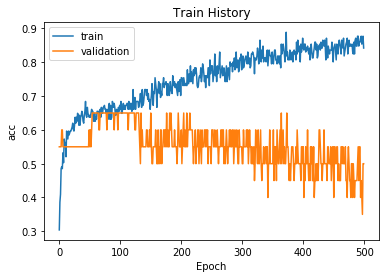

In [18]:
show_train_history(train_history,'acc','val_acc')

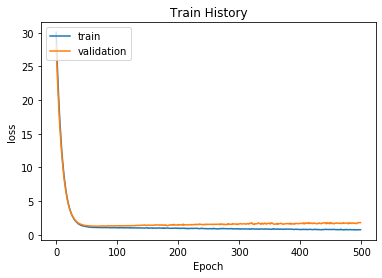

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
#from keras.models import load_model
#model.save('model0513_V.h5')

In [21]:
#import tensorflowjs as tfjs

In [22]:
#tfjs.converters.save_keras_model(model,'./model_file')

In [23]:
#converter = tf.lite.TFLiteConverter.from_keras_model(model)        #tf.lite這個要 tensorflow2.0才能裝 
#tflite_model = converter.convert()
#open("ann.tflite" , "wb").write(tflite_model)

In [24]:
test = pd.read_csv('0625test_data_final_real_Lite.csv')

In [25]:
test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)

In [26]:
test_feature = test.columns[1:]
test_target = test.columns[0]
test_feature = test[test_feature]
test_y = test[test_target]
test_y = test_y.values
test_y = np_utils.to_categorical(test_y, num_classes = 4)

In [27]:
test_scaledFeatures  = ( ( test_feature - train_feature.mean(axis=0) ) / train_feature.std(axis=0) )

In [28]:
test_out =  model.predict(test_scaledFeatures)

In [29]:
test_out

array([[0.11627333, 0.26260924, 0.47194436, 0.14917304],
       [0.85487014, 0.03820459, 0.06329235, 0.04363294],
       [0.56633645, 0.39274925, 0.01548013, 0.02543414],
       [0.92775124, 0.02976664, 0.020909  , 0.02157324],
       [0.5572289 , 0.11918038, 0.21477094, 0.10881984],
       [0.08406934, 0.54023397, 0.2616611 , 0.11403554],
       [0.2488461 , 0.4756761 , 0.17246401, 0.10301378],
       [0.9315457 , 0.01527941, 0.02943455, 0.02374036],
       [0.9360523 , 0.01782613, 0.02460047, 0.02152105],
       [0.14170453, 0.56170845, 0.19108917, 0.10549781],
       [0.70064163, 0.04269039, 0.17434706, 0.08232092]], dtype=float32)

In [30]:
test_out_class =  model.predict_classes(test_scaledFeatures)

In [31]:
test_out_class

array([2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [32]:
test['HOSDAY'].values

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [33]:
pd.crosstab( test['HOSDAY'].values, test_out_class, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,5,0,0
1,2,3,1


In [34]:
precision, recall, fscore, support = score( test['HOSDAY'].values, test_out_class)

C:\Users\8064\Anaconda31\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.71428571 1.         0.        ]
recall: [1.  0.5 0. ]
fscore: [0.83333333 0.66666667 0.        ]
support: [5 6 0]


In [36]:
score2 = model.evaluate(test_scaledFeatures, test_y, verbose=2)
score2

[1.3468899726867676, 0.7272727489471436]